In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family =font_name)  #rc : 리모트컨트롤

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"]= False

## 주제 : 서울시 구별 CCTV 현황 분석

### 부제 : 우리 동네 CCTV는 충분한가?

#### 자료 출처 
- cctv : https://data.seoul.go.kr/dataList/OA-2734/F/1/datasetView.do
- 인구 : https://data.seoul.go.kr/dataList/10020/S/2/datasetView.do

## 1. Data Definition

### (1) CCTV Load

In [2]:
cctv_seoul = pd.read_csv("Data/data/seoul/cctv.csv")
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


### (2) Population Load

In [3]:
pop_seoul = pd.read_excel("Data/data/seoul/Report.xls", usecols ='B, D, G, J, N',
                            header = 2)
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


In [4]:
?pd.read_excel

Signature:
pd.read_excel(
    io,
    sheet_name: 'str | int | list[IntStrT] | None' = 0,
    header: 'int | Sequence[int] | None' = 0,
    names=None,
    index_col: 'int | Sequence[int] | None' = None,
    usecols=None,
    squeeze: 'bool | None' = None,
    dtype: 'DtypeArg | None' = None,
    engine: "Literal['xlrd', 'openpyxl', 'odf', 'pyxlsb'] | None" = None,
    converters=None,
    true_values: 'Iterable[Hashable] | None' = None,
    false_values: 'Iterable[Hashable] | None' = None,
    skiprows: 'Sequence[int] | int | Callable[[int], object] | None' = None,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    parse_dates=False,
    date_parser=None,
    thousands: 'str | None' = None,
    decimal: 'str' = '.',
    comment: 'str | None' = None,
    skipfooter: 'int' = 0,
    convert_float: 'bool | None' = None,
    mangle_dupe_cols: 'bool' = True,
    storage_options: 'StorageOptio

### (3) EDA & Preprocessing

#### 1) 컬럼 이름 변경

- CCTV 자료에서 "기관명" 이란느 컬럼을 "구별"로 변경

In [5]:
cctv_seoul.rename(columns ={'기관명':'구별'}, inplace =True)
# cctv_seoul.columns =['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년']
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


- 인구 자료에서 컬럼명은 각각 '구별', '인구수', '한국인', '외국인', '고령자'로 변경

In [8]:
pop_seoul.columns =['구별', '인구수', '한국인', '외국인', '고령자']
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


#### 2) CCTV 현황 탐색

- 어느 구가 가장 많이 설치되어 있는가? 또는 적게 설치되어 있는가?

In [9]:
print(cctv_seoul.groupby('구별').max())
print('-----------------------------------------')
print(cctv_seoul[['구별', '소계']].max())
print(cctv_seoul[['구별', '소계']].min())
print('---------------------------------------------------')
print(cctv_seoul["구별"][cctv_seoul["소계"] ==cctv_seoul["소계"].max()])
print(cctv_seoul["구별"][cctv_seoul["소계"] ==cctv_seoul["소계"].min()])
print('---------------------------------------------------------')
print(cctv_seoul.sort_values(by ="소계", ascending =False)[["구별", '소계']])

        소계  2013년도 이전  2014년  2015년  2016년
구별                                        
강남구   3238       1292    430    584    932
강동구   1010        379     99    155    377
강북구    831        369    120    138    204
강서구    911        388    258    184     81
관악구   2109        846    260    390    613
광진구    878        573     78     53    174
구로구   1884       1142    173    246    323
금천구   1348        674     51    269    354
노원구   1566        542     57    451    516
도봉구    825        238    159     42    386
동대문구  1870       1070     23    198    579
동작구   1302        544    341    103    314
마포구    980        314    118    169    379
서대문구  1254        844     50     68    292
서초구   2297       1406    157    336    398
성동구   1327        730     91    241    265
성북구   1651       1009     78    360    204
송파구   1081        529     21     68    463
양천구   2482       1843    142     30    467
영등포구  1277        495    214    195    373
용산구   2096       1368    218    112    398
은평구   2108 

#### 3) "최근 증가율" 이라는 파생변수를 추가

- (2014+2015+2016)/2013년도 이전 *100
- CCTV의 설치 증가율에 따라 가장 높은 구와 가장 적은 구를 탐색(각각 3개씩)

In [10]:
cctv_seoul["최근 증가율"] = ((cctv_seoul['2014년']+cctv_seoul['2015년']+cctv_seoul['2016년'])/cctv_seoul['2013년도 이전'])*100
# cctv_seoul["구별"][cctv_seoul["최근 증가율"]==cctv_seoul['최근 증가율'].max()]
print(cctv_seoul.sort_values(by ='최근 증가율')[:][0:3])
print(cctv_seoul.sort_values(by ='최근 증가율', ascending =False).head(3))
print(cctv_seoul.sort_values(by = '최근 증가율', ascending = False).tail(3))

      구별    소계  2013년도 이전  2014년  2015년  2016년     최근 증가율
18   양천구  2482       1843    142     30    467  34.671731
13  서대문구  1254        844     50     68    292  48.578199
20   용산구  2096       1368    218    112    398  53.216374
     구별    소계  2013년도 이전  2014년  2015년  2016년      최근 증가율
22  종로구  1619        464    314    211    630  248.922414
9   도봉구   825        238    159     42    386  246.638655
12  마포구   980        314    118    169    379  212.101911
      구별    소계  2013년도 이전  2014년  2015년  2016년     최근 증가율
20   용산구  2096       1368    218    112    398  53.216374
13  서대문구  1254        844     50     68    292  48.578199
18   양천구  2482       1843    142     30    467  34.671731


#### 4) CCTV Data 중간 Checkpoint

In [11]:
cctv_seoul.to_csv("Data/data/seoul/cctv_seoul.csv", encoding = 'utf-8')

In [12]:
cctv_seoul = pd.read_csv("Data/data/seoul/cctv_seoul.csv")
del cctv_seoul["Unnamed: 0"]
cctv_seoul

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780
5,광진구,878,573,78,53,174,53.228621
6,구로구,1884,1142,173,246,323,64.973730
7,금천구,1348,674,51,269,354,100.000000
8,노원구,1566,542,57,451,516,188.929889
9,도봉구,825,238,159,42,386,246.638655


#### 5) 인구 데이터에서 전처리

In [13]:
#### 필요없는 행 삭제 : drop(), del
pop_seoul.drop([0], inplace = True)

In [58]:
pop_seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470
6,동대문구,364962,349308,15654,56284
7,중랑구,411552,406868,4684,59992
8,성북구,453902,442226,11676,66896
9,강북구,327511,323862,3649,57002
10,도봉구,345041,342861,2180,54293


In [64]:
#### 구별 데이터의 중복이나 결측치 등을 확인

# 결측치 확인
pop_seoul.info()
pop_seoul["구별"].unique
pop_seoul[pop_seoul['구별'].isnull()]

# 중복값 확인
pop_seoul['구별'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 1 to 26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구별      25 non-null     object
 1   인구수     26 non-null     int64 
 2   한국인     26 non-null     int64 
 3   외국인     26 non-null     int64 
 4   고령자     26 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


종로구     1
마포구     1
송파구     1
강남구     1
서초구     1
관악구     1
동작구     1
영등포구    1
금천구     1
구로구     1
강서구     1
양천구     1
서대문구    1
중구      1
은평구     1
노원구     1
도봉구     1
강북구     1
성북구     1
중랑구     1
동대문구    1
광진구     1
성동구     1
용산구     1
강동구     1
Name: 구별, dtype: int64

In [14]:
#### 결측치 삭제
pop_seoul.drop([26], inplace =True)

In [66]:
pop_seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470
6,동대문구,364962,349308,15654,56284
7,중랑구,411552,406868,4684,59992
8,성북구,453902,442226,11676,66896
9,강북구,327511,323862,3649,57002
10,도봉구,345041,342861,2180,54293


#### 6) 인구 데이터 현황

In [72]:
##### 구별로 인구 수 탐색(전체인구수, 외국인, 고령자)
print(pop_seoul.sort_values('인구수', ascending = False).head(3))
print(pop_seoul.sort_values('인구수').head(3))

print("---------------------------------------------")

print(pop_seoul.sort_values('외국인').head(3))
print(pop_seoul.sort_values('외국인', ascending = False).head(3))

print("---------------------------------------------")

print(pop_seoul.sort_values('고령자').head(3))
print(pop_seoul.sort_values('고령자', ascending = False).head(3))

     구별     인구수     한국인   외국인    고령자
24  송파구  671994  665282  6712  77978
16  강서구  608361  601696  6665  77381
23  강남구  557865  552976  4889  65859
    구별     인구수     한국인    외국인    고령자
2   중구  135139  126082   9057  21655
1  종로구  164348  154549   9799  26429
3  용산구  245411  229909  15502  37238
---------------------------------------------
     구별     인구수     한국인   외국인    고령자
10  도봉구  345041  342861  2180  54293
9   강북구  327511  323862  3649  57002
15  양천구  473087  469221  3866  56070
      구별     인구수     한국인    외국인    고령자
19  영등포구  403988  369128  34860  54704
17   구로구  440396  408369  32027  59838
18   금천구  253344  234238  19106  34640
---------------------------------------------
     구별     인구수     한국인    외국인    고령자
2    중구  135139  126082   9057  21655
1   종로구  164348  154549   9799  26429
18  금천구  253344  234238  19106  34640
     구별     인구수     한국인   외국인    고령자
24  송파구  671994  665282  6712  77978
16  강서구  608361  601696  6665  77381
12  은평구  490253  485902  4351  75535


In [ ]:
#### 전체 인구대비 외국인 비율, 고령자 비율 파생변수 추가해서 순위 파악

In [15]:
pop_seoul['인구대비 외국인 비율'] = (pop_seoul['외국인']/pop_seoul['인구수'])*100
pop_seoul['인구대비 고령자인 비율'] = (pop_seoul['고령자']/pop_seoul['인구수'])*100
pop_seoul

print(pop_seoul.sort_values('인구대비 고령자인 비율').head(3))
print(pop_seoul.sort_values('인구대비 고령자인 비율', ascending = False).head(3))
print('-------------------------------------------------------')
print(pop_seoul.sort_values('인구대비 외국인 비율').head(3))
print(pop_seoul.sort_values('인구대비 외국인 비율', ascending = False).head(3))


     구별     인구수     한국인   외국인    고령자  인구대비 외국인 비율  인구대비 고령자인 비율
24  송파구  671994  665282  6712  77978     0.998818     11.603973
23  강남구  557865  552976  4889  65859     0.876377     11.805544
15  양천구  473087  469221  3866  56070     0.817186     11.851943
    구별     인구수     한국인   외국인    고령자  인구대비 외국인 비율  인구대비 고령자인 비율
9  강북구  327511  323862  3649  57002     1.114161     17.404606
1  종로구  164348  154549  9799  26429     5.962348     16.081121
2   중구  135139  126082  9057  21655     6.701988     16.024242
-------------------------------------------------------
     구별     인구수     한국인   외국인    고령자  인구대비 외국인 비율  인구대비 고령자인 비율
10  도봉구  345041  342861  2180  54293     0.631809     15.735231
11  노원구  555803  551902  3901  75081     0.701867     13.508563
15  양천구  473087  469221  3866  56070     0.817186     11.851943
      구별     인구수     한국인    외국인    고령자  인구대비 외국인 비율  인구대비 고령자인 비율
19  영등포구  403988  369128  34860  54704     8.628969     13.540996
18   금천구  253344  234238  19106  34640     7.541

### (4) Final Analysis

#### 1) 인구 대비 CCTV 설치 현황

In [16]:
#### CCTV 데이터와 인구 데이터를 합치기
data_result = pd.merge(pop_seoul, cctv_seoul, on ="구별")
data_result.head()

,구별,인구수,한국인,외국인,고령자,인구대비 외국인 비율,인구대비 고령자인 비율,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
0,종로구,164348,154549,9799,26429,5.962348,16.081121,1619,464,314,211,630,248.922414
1,중구,135139,126082,9057,21655,6.701988,16.024242,1023,413,190,72,348,147.699758
2,용산구,245411,229909,15502,37238,6.316750,15.173729,2096,1368,218,112,398,53.216374
3,성동구,314551,306532,8019,41752,2.549348,13.273523,1327,730,91,241,265,81.780822
4,광진구,371671,357149,14522,44470,3.907219,11.964883,878,573,78,53,174,53.228621


In [17]:
#### 필요없는 컬럼 삭제
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']

In [18]:
data_result.head()

,구별,인구수,한국인,외국인,고령자,인구대비 외국인 비율,인구대비 고령자인 비율,소계,최근 증가율
0,종로구,164348,154549,9799,26429,5.962348,16.081121,1619,248.922414
1,중구,135139,126082,9057,21655,6.701988,16.024242,1023,147.699758
2,용산구,245411,229909,15502,37238,6.316750,15.173729,2096,53.216374
3,성동구,314551,306532,8019,41752,2.549348,13.273523,1327,81.780822
4,광진구,371671,357149,14522,44470,3.907219,11.964883,878,53.228621


In [19]:
#### '구별'을 인덱스로 정의
data_result.set_index('구별', inplace =True)
data_result.head()

,인구수,한국인,외국인,고령자,인구대비 외국인 비율,인구대비 고령자인 비율,소계,최근 증가율
구별,,,,,,,,
종로구,164348,154549,9799,26429,5.962348,16.081121,1619,248.922414
중구,135139,126082,9057,21655,6.701988,16.024242,1023,147.699758
용산구,245411,229909,15502,37238,6.316750,15.173729,2096,53.216374
성동구,314551,306532,8019,41752,2.549348,13.273523,1327,81.780822
광진구,371671,357149,14522,44470,3.907219,11.964883,878,53.228621


- CCTV개수(소계)와 인구 데이터의 3가지 변수(인구수, 고령자, 외국인)가 관계 여부

- 상관 계수 : -1~1

In [20]:
print(np.corrcoef(data_result["인구대비 외국인 비율"], data_result["소계"]))
# 두 데이터의 상관 관계를 수치로 뽑아주는 함수
print(np.corrcoef(data_result["인구대비 고령자인 비율"], data_result["소계"]))
print(np.corrcoef(data_result["인구수"], data_result["소계"]))
# 비율이 다 비슷한 경우에는 말이 되는 변수로 분석하는게 낫다(여기서는 인구수로)
# 시각화 쪽으로는 관계여부 파악하기 힘들때는 수치로 접근하는편이 좋다

[[ 1.         -0.04656978]
 [-0.04656978  1.        ]]
[[ 1.         -0.26783452]
 [-0.26783452  1.        ]]
[[1.         0.23037183]
 [0.23037183 1.        ]]


AxesSubplot(0.125,0.11;0.775x0.77)


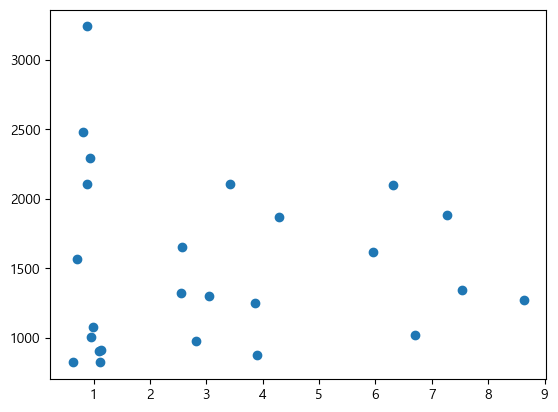

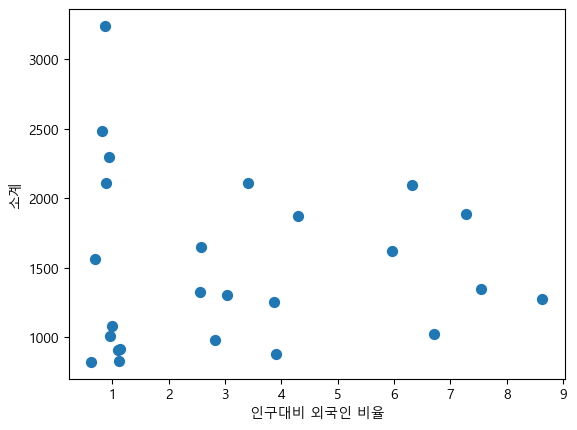

In [21]:
print(plt.scatter(data_result["인구대비 외국인 비율"], data_result["소계"]))
print(data_result.plot.scatter('인구대비 외국인 비율', '소계', s = 50))

AxesSubplot(0.125,0.11;0.775x0.77)


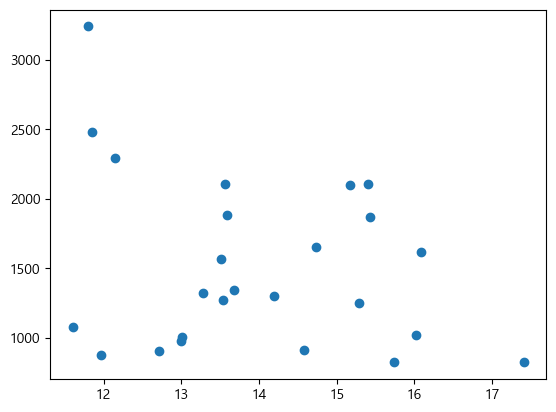

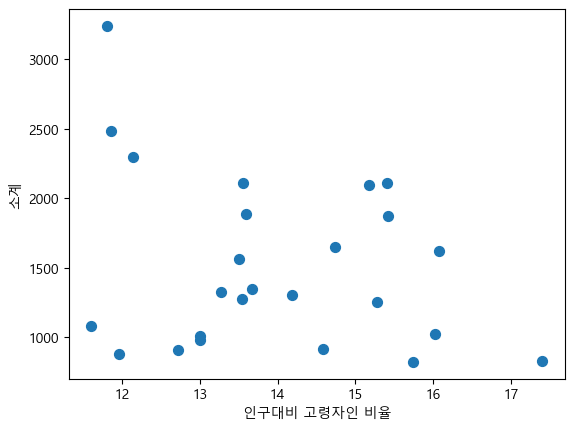

In [164]:
print(plt.scatter(data_result["인구대비 고령자인 비율"], data_result["소계"]))
print(data_result.plot.scatter('인구대비 고령자인 비율', '소계', s = 50))

AxesSubplot(0.125,0.11;0.775x0.77)


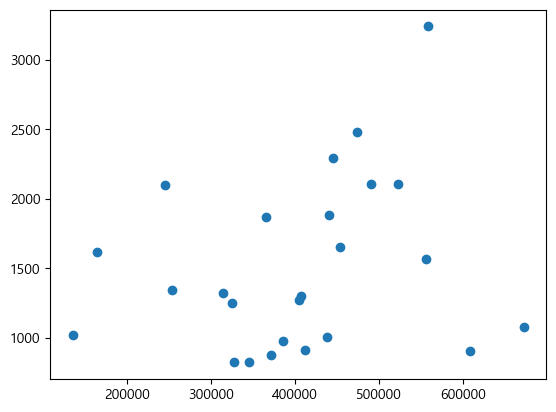

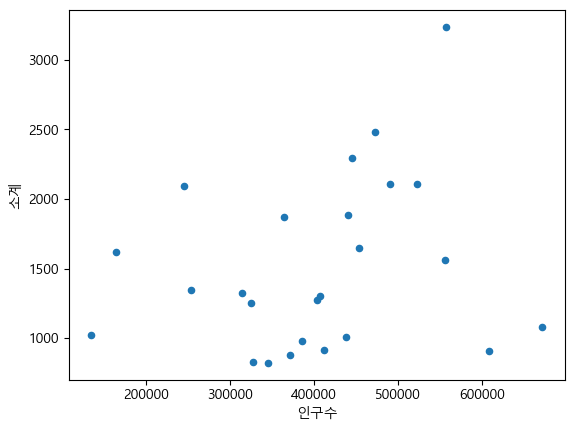

In [165]:
print(plt.scatter(data_result["인구수"], data_result["소계"]))
print(data_result.plot.scatter('인구수', '소계'))


#### 2) 중간 Checkpoint

In [22]:
data_result.to_csv("Data/data/seoul/cctv_result.csv", encoding = 'utf-8')

In [23]:
data_result = pd.read_csv("Data/data/seoul/cctv_result.csv", index_col ='구별')
# index는 저장시에 기본 인덱스로 바뀐다 따라서 불러올때 인덱스 그대로 가져오려면
# index_col이라는 명령어를 쓴다
data_result.head()

,인구수,한국인,외국인,고령자,인구대비 외국인 비율,인구대비 고령자인 비율,소계,최근 증가율
구별,,,,,,,,
종로구,164348,154549,9799,26429,5.962348,16.081121,1619,248.922414
중구,135139,126082,9057,21655,6.701988,16.024242,1023,147.699758
용산구,245411,229909,15502,37238,6.316750,15.173729,2096,53.216374
성동구,314551,306532,8019,41752,2.549348,13.273523,1327,81.780822
광진구,371671,357149,14522,44470,3.907219,11.964883,878,53.228621


#### 3) Visualization

<AxesSubplot:ylabel='구별'>

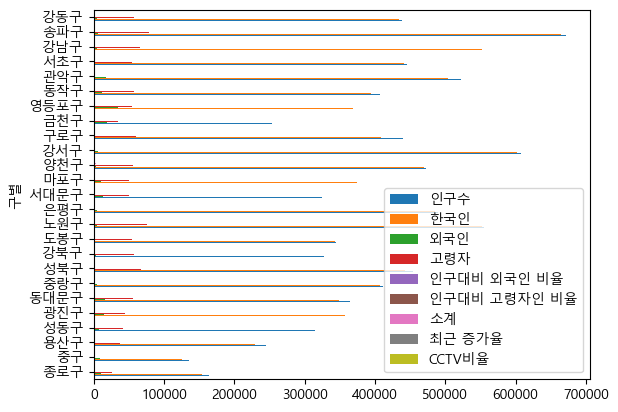

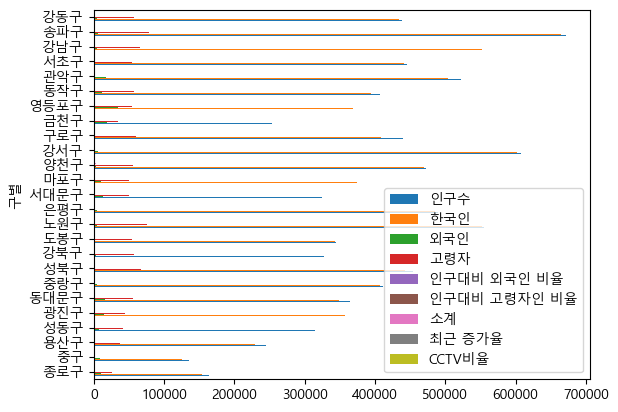

In [26]:
##### CCTV가 가장 많이 설치된 구
# data_result["소계"].plot(kind = 'barh', figsize =(10, 8), grid =True)
data_result.plot(kind ='barh')
data_result.plot.barh()
# grid 눈금을 보고 싶을때 쓰는 명령어


In [28]:
#### 인구 대비 CCTV 개수를 확인

#### 'CCTV비율' 파생변수 추가 : (소계/인구수)*100

Text(0.5, 10, '평균')

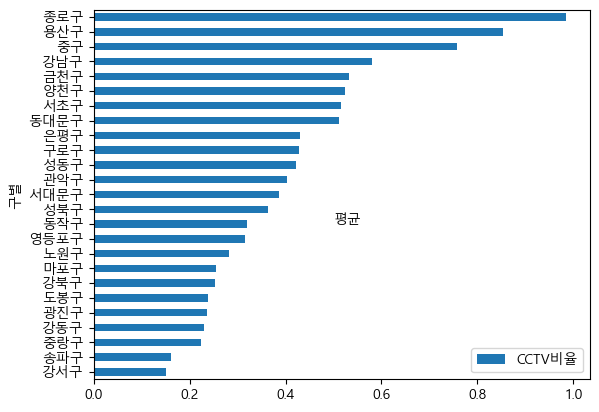

In [24]:
data_result["CCTV비율"] = (data_result['소계']/data_result['인구수'])*100
data_result.sort_values(by = "CCTV비율")[['CCTV비율']].plot(kind = 'barh')
# data_result['CCTV비율'].sort_values().plot(kind = 'barh')
plt.text(0.5, 10, '평균')

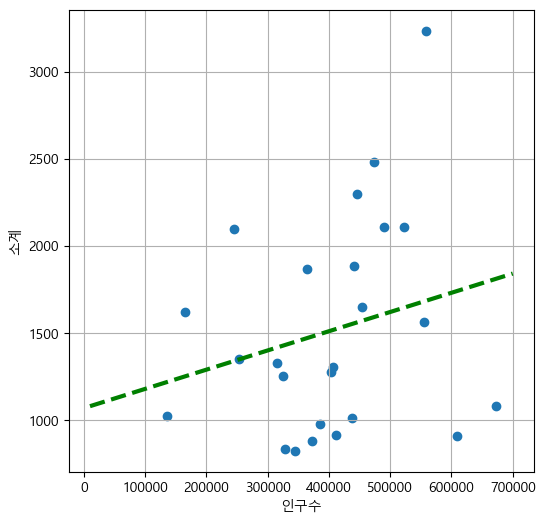

In [29]:
#### CCTV 갯수와 인구 수가 서로 관계가 있는지 확인
fx = np.linspace(10000, 700000, 100) # 선을 조금더 매끄럽게 만들어준다

plt.figure(figsize= (6, 6))
plt.scatter(data_result["인구수"], data_result["소계"])
# plt.plot(data_result['인구수'], p1(data_result['인구수']))
# plt.plot(data_result['인구수'], pf[0]*data_result['인구수']+pf[1])
plt.plot(fx, p1(fx), lw = 3, color ='g', ls ='dashed')
plt.xlabel("인구수")
plt.ylabel("소계")
plt.grid()
## 회귀선의 역할 : 데이터에 대한 설명 과 미래 데이터에 대한 예측


[1.10432363e-03 1.06864009e+03]
 
0.001104 x + 1069


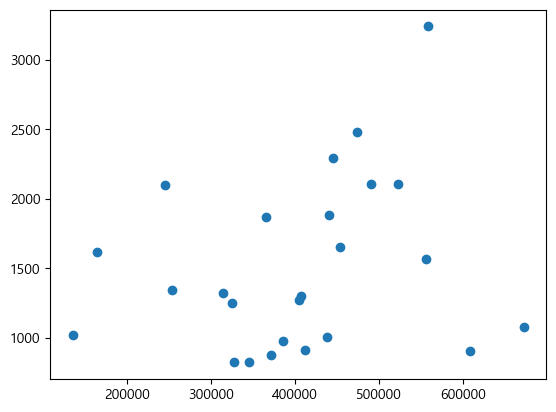

In [28]:
##### y = ax + b

pf = np.polyfit(data_result['인구수'], data_result['소계'], 1)
print(pf)
# pf[0]*350000 + pf[1]

p1 = np.poly1d(pf)
print(p1)

plt.scatter(data_result["인구수"], data_result["소계"])

# 결과는 (a : 기울기, b : y절편)

In [32]:
?np.polyfit

In [33]:
sns.relplot(x = '인구수', y='소계', data = data_result, s= 50)

In [30]:
##### 각 데이터의 오차를 구해서 '오차'라는 파생변수 추가

data_result['오차'] = np.abs(data_result['소계'] - p1(data_result['인구수']))
#np.abs 는 절대값으로 계산해주는 모듈이다
data_result.head()

,인구수,한국인,외국인,고령자,인구대비 외국인 비율,인구대비 고령자인 비율,소계,최근 증가율,CCTV비율,오차
구별,,,,,,,,,,
종로구,164348,154549,9799,26429,5.962348,16.081121,1619,248.922414,0.985105,368.866533
중구,135139,126082,9057,21655,6.701988,16.024242,1023,147.699758,0.756998,194.877278
용산구,245411,229909,15502,37238,6.316750,15.173729,2096,53.216374,0.854077,756.346747
성동구,314551,306532,8019,41752,2.549348,13.273523,1327,81.780822,0.421871,89.006188
광진구,371671,357149,14522,44470,3.907219,11.964883,878,53.228621,0.236230,601.085154


In [31]:
# data_result['오차'].sort_values(ascending = False)
df_sort = data_result.sort_values(by = '오차', ascending = False)
# data_result.sort_values(by = '오차', ascending = False)[['오차']] #오차만 보고싶을때
df_sort.head()


,인구수,한국인,외국인,고령자,인구대비 외국인 비율,인구대비 고령자인 비율,소계,최근 증가율,CCTV비율,오차
구별,,,,,,,,,,
강남구,557865,552976,4889,65859,0.876377,11.805544,3238,150.619195,0.580427,1553.296412
양천구,473087,469221,3866,56070,0.817186,11.851943,2482,34.671731,0.524639,890.918761
강서구,608361,601696,6665,77381,1.095567,12.719586,911,134.793814,0.149747,829.467513
용산구,245411,229909,15502,37238,6.316750,15.173729,2096,53.216374,0.854077,756.346747
서초구,445164,440954,4210,54055,0.945719,12.142716,2297,63.371266,0.515990,736.754790


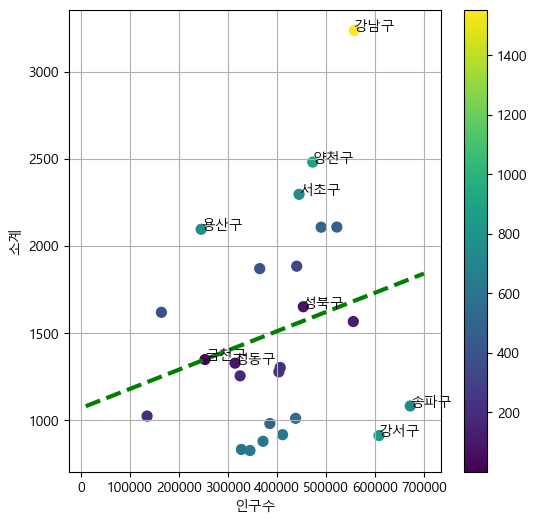

In [32]:
fx = np.linspace(10000, 700000, 100) # 선을 조금더 매끄럽게 만들어준다

plt.figure(figsize= (6, 6))
plt.scatter(data_result["인구수"], data_result["소계"], c = data_result['오차'],
           s = 50)

plt.plot(fx, p1(fx), lw = 3, color ='g', ls ='dashed')
plt.xlabel("인구수")
plt.ylabel("소계")
plt.grid()
plt.colorbar() #오차의 크기에 따라 색깔이 어떤지 알려준다
for i in range(6):
    plt.text(df_sort['인구수'][i], df_sort['소계'][i], df_sort.index[i])
########## 오차가 가장 큰 구 6개

for i in range(3):
    plt.text(df_sort['인구수'][24-i], df_sort['소계'][24-i],df_sort.index[24-i])
##### 오차가 가장 작은 구 3개


#### 지도 이용

- https://github.com/southkorea/southkorea-maps

In [33]:
##### 지도를 이용하여 CCTv 현황 파악
import folium

map = folium.Map(location =[37.5000195, 127.0229206], zoom_start = 10)

geo_path = 'Data/data/seoul/skorea_municipalities_geo_simple_seoul.json'

map.choropleth(geo_data = geo_path, data = data_result['소계'], key_on = "feature.id",
              columns = [data_result.index, data_result["소계"]], fill_color ="YlGn")
map

C:\Users\acorn\anaconda3\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [34]:
##### 최종 결과물 저장

df_sort.to_csv('Data/data/seoul/cctv_result.csv', encoding = 'utf-8')